# Project Title

### By: Polina, Tyler Marino

### Notes: Segmentation using Watershed algorithm

import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def watershed():
    root = os.getcwd()
    imgPath = os.path.join('image.jpg')
    
    img = cv2.imread(imgpath)
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.subplot(231)
    plt.imshow(img, cmap = 'gray')

    plt.subplot(232)
    _,imgThreshold = cv2.threshold(img, alpha, beta, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap = 'gray')

    plt.subplot(233)
    #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv.morphologyEx(imgThreshold, cv.MORPH_DILATE, kernel)
    plt.imshow(imgDilate)

    plt.subplot(234)
    #find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    distTransform = cv.distanceTransform(imageDialate, cv.DIST_L2, 5)
    plt.imshow()

    plt.subplot(235)
    _, distThresh = cv2.threshold(distTrans, min, max, cv2.THRESH_BINARY)
    plt.imshow(distThresh)

    plt.subplot(236)
    distThresh = np.unit8(distThresh)
    _,labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels)

    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv2.watershed(imgRGB, labels)
    plt.imshow(labels)
    plt.show()



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd

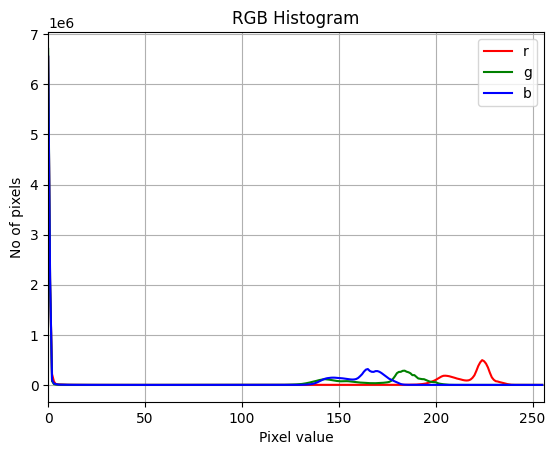

H min: 0 S Min: 0 V Min: 0
H max: 179 S Max: 255 V Max: 255
H mean: 20.94323371548443 S mean: 34.507235833393814 V mean: 95.4888669890405


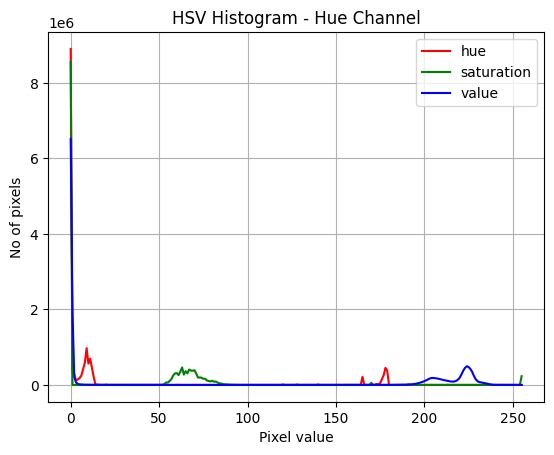

Standard deviation of the translated image:  85.48616127178856
Mean of the translated image:  97.3382346319683


C:\Users\Tyler Marino\AppData\Local\Temp\ipykernel_25756\2908938540.py:57: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(imgRGB_Translate.ravel(),256,[0,256])


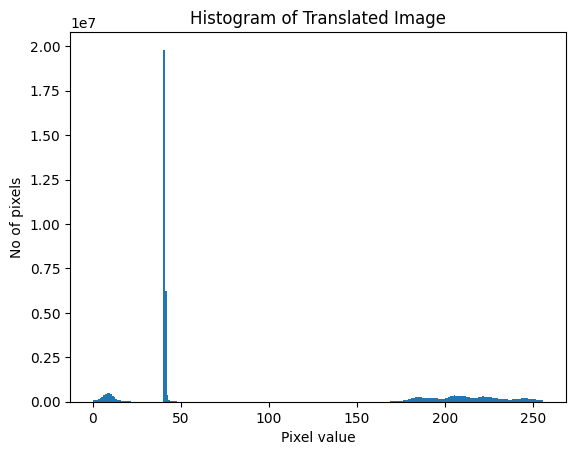

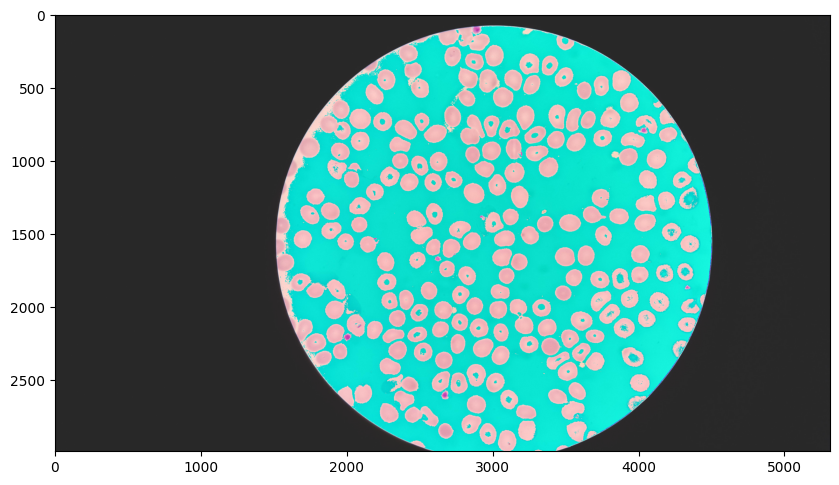

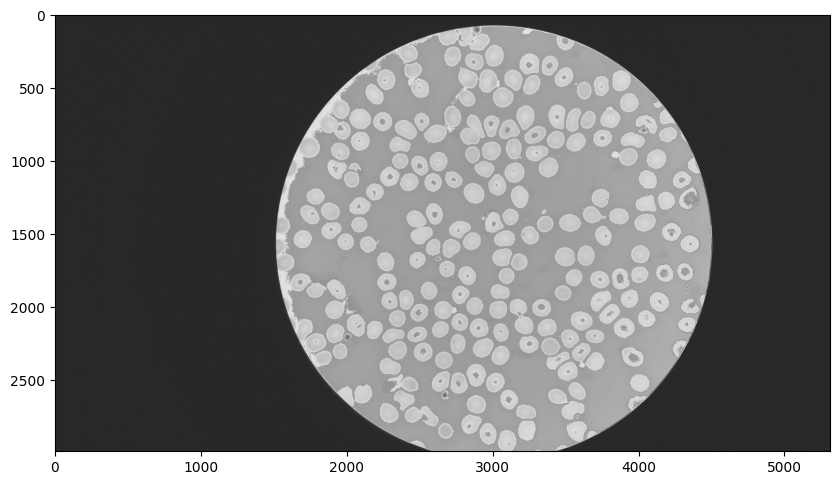

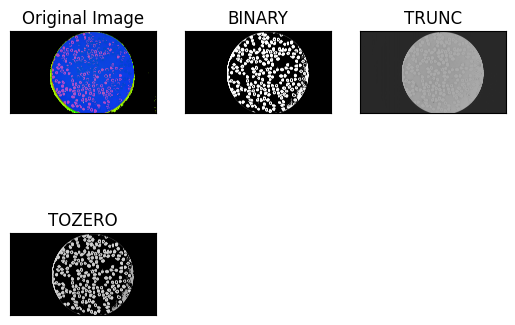

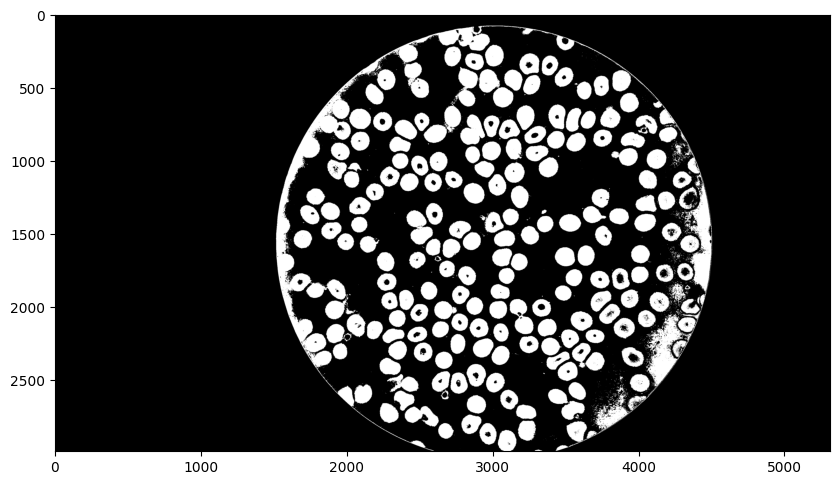

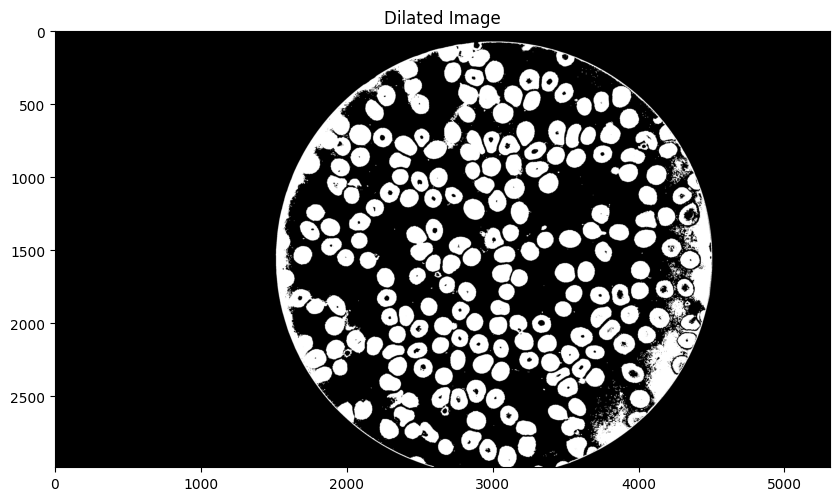

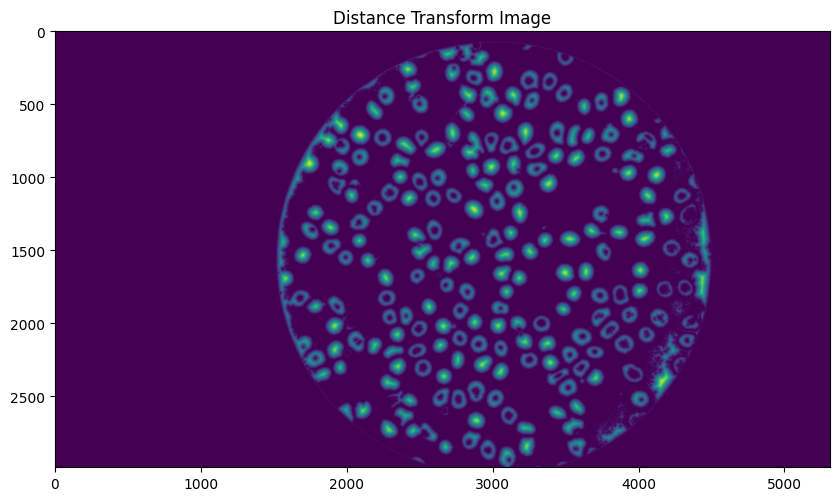

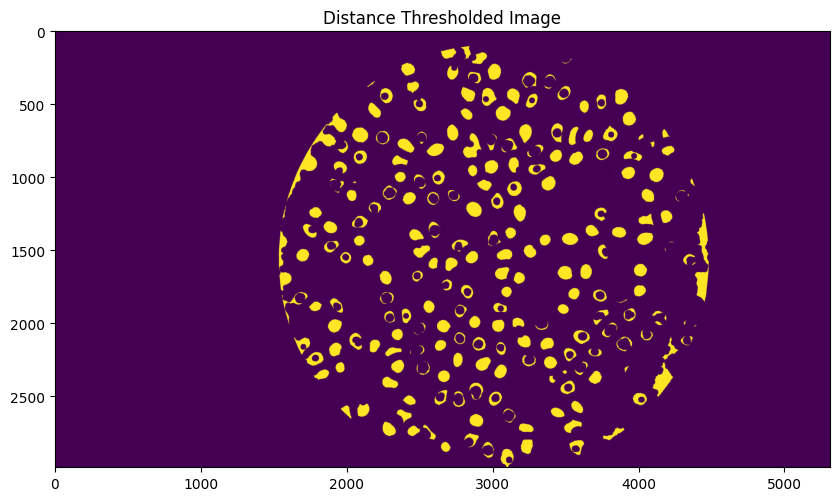

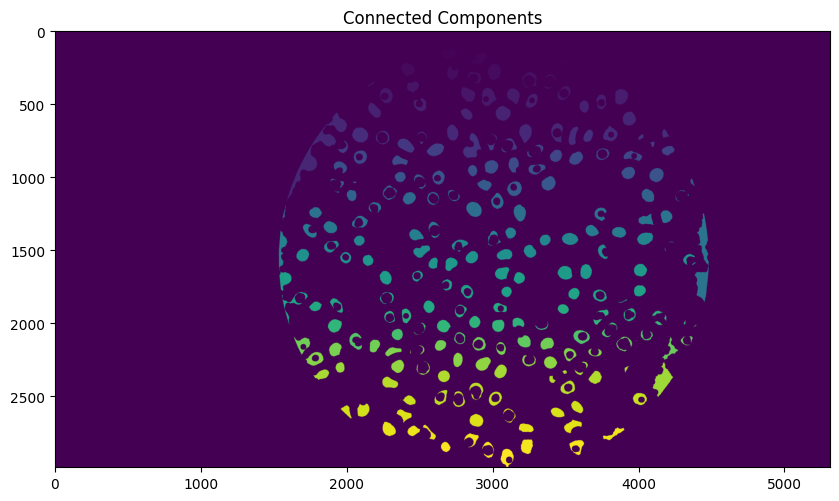

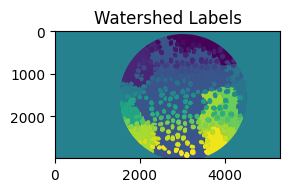

In [33]:
# Exploring the watershed algorithm for image segmentation

def watershed():
    root = os.getcwd()
    imgPath = os.path.join('Data/SampleBloodCells.jpg')
    
    img= cv2.imread(imgPath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgGraw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # plt.figure()
    # plt.subplot(23)
    # plt.imshow(imgRGB)
    
    #Histogram for each channel
    imgHist = []
    color = ('r','g','b')
    for i,col in enumerate(color):
        hist = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
        imgHist.append(hist)
        plt.plot(hist, color = col)
        plt.xlim([0,256])
    plt.title('RGB Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend(color)
    plt.grid()
    plt.show()

    # make histogram in hsv space

    h, s, v = img[:,:,0], img[:,:,1], img[:,:,2]
    #print simple stats
    print("H min:", np.min(h), "S Min:", np.min(s), "V Min:", np.min(v))
    print("H max:", np.max(h), "S Max:", np.max(s), "V Max:", np.max(v))
    print("H mean:", np.mean(h), "S mean:", np.mean(s), "V mean:", np.mean(v))
    #
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="hue")
    plt.plot(hist_s, color='g', label="saturation")
    plt.plot(hist_v, color='b', label="value")
    plt.title('HSV Histogram - Hue Channel')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend()
    plt.grid()
    plt.show()


    # Original Image
    imgRGB_Translate = imgRGB+40
    print("Standard deviation of the translated image: ",np.std(imgRGB_Translate))
    print("Mean of the translated image: ",np.mean(imgRGB_Translate))
    plt.hist(imgRGB_Translate.ravel(),256,[0,256])
    plt.title('Histogram of Translated Image')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.show()
    plt.figure(figsize=(10,7))
    plt.imshow(imgRGB_Translate)
    plt.show()
    Translated_to_Gray = cv2.cvtColor(imgRGB_Translate, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(10,7))
    plt.imshow(Translated_to_Gray, cmap='gray')
    plt.show()
    ret,thresh1 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_BINARY)
    # ret,thresh2 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_BINARY_INV)   Can't use this because it inverts the cells to black
    ret,thresh3 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TOZERO)
    # ret,thresh5 = cv2.threshold(Translated_to_Gray,170,255,cv2.THRESH_TOZERO_INV) Can't use this because it inverts the cells to black
    
    titles = ['Original Image','BINARY','TRUNC','TOZERO']
    images = [img, thresh1, thresh3, thresh4]
    
    for i in range(len(titles)):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    
    plt.show()
    plt.figure(figsize=(10,7))
    plt.imshow(thresh1, cmap='gray')
    plt.show()

    # #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    plt.figure(figsize=(10,7))
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv2.morphologyEx(thresh1, cv2.MORPH_DILATE, kernel)
    plt.imshow(imgDilate, cmap='gray')
    plt.title('Dilated Image')
    plt.show()

    # find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    plt.figure(figsize=(10,7))
    # plt.subplot(234)
    distTransform = cv2.distanceTransform(imgDilate, cv2.DIST_L2, 5)
    plt.imshow(distTransform)
    plt.title('Distance Transform Image')   
    plt.show()
    
    plt.figure(figsize=(10,7))
    _, distThresh = cv2.threshold(distTransform, 20, 255, cv2.THRESH_BINARY)
    plt.imshow(distThresh)
    plt.title('Distance Thresholded Image')
    plt.show()

    plt.figure(figsize=(10,7))
    distThresh = np.uint8(distThresh)
    _,labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels)
    plt.title('Connected Components')
    plt.show()

    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv2.watershed(imgRGB, labels)
    plt.imshow(labels)
    plt.title('Watershed Labels')
    plt.show()




watershed()

# Classification Using Logistic Regression and human extracted features

In [34]:
# Feature Extraction post segmentation

def featureExtraction(path, parasiticCell=True):
    root = os.getcwd()
    imgPath = os.path.join(path)
    
    img= cv2.imread(imgPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.figure(figsize=(10,7))
    # plt.imshow(img)
    # plt.show()
    # print("Mean value of non-black pixels: ", np.mean(img[img>10]))
    # print("Max value of non-black pixels: ", np.max(img[img>10]))
    # print("Standard Deviation of non-black pixels: ", np.std(img[img>10]))

    hist_r = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
    hist_b = cv2.calcHist([img],[2],None,[256],[0,256])
    # plt.plot(hist_r, color='r', label="Red Channel")
    # plt.plot(hist_g, color='g', label="Green Channel")
    # plt.plot(hist_b, color='b', label="Blue Channel")
    # plt.title('RGB Histogram')
    # plt.xlabel('Pixel value')
    # plt.ylabel('No of pixels')
    # plt.legend()
    # plt.grid()
    # plt.show()

    imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # plt.figure(figsize=(10,7))
    # plt.imshow(imgGray, cmap='gray')
    # plt.show()
    # print("Mean value of gray image non-black pixels: ", np.mean(imgGray[imgGray>10]))
    # print("Max value of gray image non-black pixels: ", np.max(imgGray[imgGray>10]))
    # print("Standard Deviation of gray image non-black pixels: ", np.std(imgGray[imgGray>10]))
    hist_gray = cv2.calcHist([imgGray],[0],None,[256],[0,256])
    # plt.plot(hist_gray, color='k', label="Gray Channel")
    # plt.title('Gray Histogram')
    # plt.xlabel('Pixel value')
    # plt.ylabel('No of pixels')
    # plt.legend()
    # plt.grid()
    # plt.show()

    #Create clusters in the image with arbitrary number of clusters, perhaps dbscan would be better?
    from sklearn.cluster import KMeans
    imgReshaped = img.reshape((-1,3))
    kmeans = KMeans(n_clusters=3, random_state=0).fit(imgReshaped)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    clusteredImage = clustered.reshape(img.shape)
    # plt.figure(figsize=(10,7))
    # plt.imshow(np.uint8(clusteredImage))
    # plt.title('Clustered Image with K=3')
    # plt.show()

    # Compare cluster values 
    #count number of pixels in each cluster
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    # print("Pixel counts per cluster: ", dict(zip(unique, counts)))
    clusterValues = kmeans.cluster_centers_
    # print("Cluster Centers (RGB): ", clusterValues)
    # plt.figure(figsize=(10,7))
    # plt.imshow([clusterValues.astype(np.uint8)])
    # plt.title('Cluster Colors')
    # plt.show()
    variance_between_clusters = np.var(clusterValues, axis=0)
    # print("Variance between cluster centers (RGB): ", variance_between_clusters)
    variance_within_clusters = kmeans.inertia_
    # print("Variance within clusters (Inertia): ", variance_within_clusters)
    # Feature Vector Creation
    # 3 cluster colors, counts, variances, 
    feature_vector = np.concatenate([clusterValues.flatten(), counts, variance_between_clusters, [variance_within_clusters]])
    # print("Feature Vector: ", feature_vector)

    


    # Super pixel segmentation with SLIC
    from skimage.segmentation import slic
    from skimage.color import label2rgb
    segments = slic(img, n_segments=10, compactness=10, sigma=1, start_label=1)
    segmentedImage = label2rgb(segments, img, kind='avg')
    # plt.figure(figsize=(10,7))
    # plt.imshow(np.uint8(segmentedImage))
    # plt.title('Segmented Image with SLIC')
    # plt.show()

    # how to get the colors of colors of the different segments
    uniqueSegments = np.unique(segments)
    segmentColors = []
    for segVal in uniqueSegments:
        mask = segments == segVal
        meanColor = img[mask].mean(axis=0)
        segmentColors.append(meanColor)
    segmentColors = np.array(segmentColors)
    # print("Segment Colors (RGB): ", segmentColors)
    # plt.figure(figsize=(10,7))
    # plt.imshow([segmentColors.astype(np.uint8)])
    # plt.title('Segment Colors')

    # plt.show()
    
# I need to create a feature vector from these values for classification
# create new function that takes in an image and outputs a feature vector
# feature vector could be mean, std, max of each channel, cluster centers and variances
# segment colors and variances
    # print("Mean of segment colors (RGB): ", np.mean(segmentColors, axis=0))
    # print("Standard Deviation of segment colors (RGB): ", np.std(segmentColors, axis=0))
    # print("Max of segment colors (RGB): ", np.max(segmentColors, axis=0))
    variance_between_segments = np.var(segmentColors, axis=0)
    # print("Variance between segment colors (RGB): ", variance_between_segments)
    variance_within_segments = 0
    for segVal in uniqueSegments:
        mask = segments == segVal
        colorsInSegment = img[mask]
        variance_within_segments += np.var(colorsInSegment, axis=0).sum()
    # print("Variance within segments (RGB): ", variance_within_segments)
    return feature_vector


    

In [35]:
featureExtraction('Data/ExampleParasiticCell.png', parasiticCell=False)

array([ 2.18196448e+02,  1.59541879e+02,  1.59180368e+02, -2.84217094e-13,
        3.97903932e-13,  8.52651283e-13,  1.85290323e+02,  9.00524194e+01,
        1.36782258e+02,  1.54790000e+04,  5.28300000e+03,  2.54000000e+02,
        9.22500075e+03,  4.26575939e+03,  4.94993900e+03,  1.91469563e+06])

In [36]:
featureExtraction('Data/ExampleUninfectedCell.png', parasiticCell=True)

array([ 2.19674849e+02,  1.68975675e+02,  1.57109797e+02, -7.38964445e-13,
        1.03739239e-12, -6.53699317e-13,  2.13531308e+02,  1.54588877e+02,
        1.50337693e+02,  4.52400000e+03,  5.52900000e+03,  9.66700000e+03,
        1.04322669e+04,  5.85083108e+03,  5.25897463e+03,  3.30082893e+05])

In [37]:
# Making logistic regression model for classification.

# First gather feature vectors for multiple images of parasitic and uninfected cells
# featureExtraction(parasiticCell=True)
# featureExtraction(parasiticCell=False)
# --- IGNORE ---

# --- IGNORE ---
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
# Sample feature vectors and labels
X = []  # Feature vectors
y = []  # Labels: 1 for parasitic, 0 for uninfected

# All_Data\cell_images is a folder in this local folder that stores all the images of the cells, there are are two subfolders Parasitized and Uninfected

data_dir = 'All_Data/cell_images'
parasitic_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')
i = 1
num_files = len(os.listdir(parasitic_dir))
for filename in os.listdir(parasitic_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  
        img_path = os.path.join(parasitic_dir, filename)
        feature_vector = featureExtraction(img_path, parasiticCell=True)
        X.append(feature_vector)
        y.append(1)  # Parasitic label
        loading_bar_length = 100
        filled_length = int(loading_bar_length * i // num_files)
        bar = '█' * filled_length + '-' * (loading_bar_length - filled_length)
        print(f'\rInfected File Embedding Progress: |{bar}| {i}/{num_files} Files', end='\r')
        i += 1
print()  # for new line after progress bar


i = 1
num_files = len(os.listdir(uninfected_dir))
for filename in os.listdir(uninfected_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(uninfected_dir, filename)
        feature_vector = featureExtraction(img_path, parasiticCell=False)
        X.append(feature_vector)
        y.append(0)  # Uninfected label
        loading_bar_length = 100
        filled_length = int(loading_bar_length * i // num_files)
        bar = '█' * filled_length + '-' * (loading_bar_length - filled_length)
        print(f'\rUninfected File Embedding Progress: |{bar}| {i}/{num_files} Files', end='\r')
        i += 1
X = np.array(X)
y = np.array(y)



Infected File Embedding Progress: |███████████████████████████████████████████████████████████████████████████████████████████████████-| 13779/13780 Files


In [38]:
# Save the dataset for future use
np.save('feature_vectors.npy', X)
np.save('labels.npy', y)


In [39]:
loaded_X = np.load('feature_vectors.npy')
loaded_y = np.load('labels.npy')

In [40]:
print("shape of X: ", loaded_X.shape)
print("shape of Y: ", loaded_y.shape)

shape of X:  (27558, 16)
shape of Y:  (27558,)


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(loaded_X, loaded_y, test_size=0.2, random_state=42)
# Train logistic regression model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)
# Evaluate model
y_pred_LR = model_LR.predict(X_test)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))
# Save the trained model
dump(model_LR, 'cell_classification_model.joblib')
# Load the trained model
model_LR = load('cell_classification_model.joblib')



[[2507  208]
 [ 361 2436]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2715
           1       0.92      0.87      0.90      2797

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512



c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Lets evaluate with different number of training points used
# To test affect on performance we need to save the results to a table/file
# lets include training curve as well
# make test size proportional to training size for consistency

comparison_table = []
for train_size in [0.1, 0.3, 0.5, 0.7, 0.9]:
    time_taken = 0  # Placeholder for time taken if needed
    start_time = None
    end_time = None
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(loaded_X, loaded_y, train_size= train_size, test_size=.05, random_state=42)
    model_LR = LogisticRegression(max_iter=3000)
    model_LR.fit(X_train, y_train)
    X_test
    y_pred_LR = model_LR.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    cm_LR = confusion_matrix(y_test, y_pred_LR)
    recall_LR = cm_LR[1,1] / (cm_LR[1,0] + cm_LR[1,1])
    precision_LR = cm_LR[1,1] / (cm_LR[0,1] + cm_LR[1,1])
    f1_score_LR = 2 * (precision_LR * recall_LR) / (precision_LR + recall_LR)
    comparison_table.append(("Logistic Regression", train_size, cm_LR, time_taken, recall_LR, precision_LR, f1_score_LR))
    dump(model_LR, f'cell_classification_LR{train_size}.joblib')
    print(f"Training Size: {train_size}")
    print("test size: ", len(y_test))
    print(confusion_matrix(y_test, y_pred_LR))
    # print(classification_report(y_test, y_pred_LR))


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Size: 0.1
test size:  1378
[[633  55]
 [ 80 610]]


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Size: 0.3
test size:  1378
[[637  51]
 [ 84 606]]


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Size: 0.5
test size:  1378
[[638  50]
 [ 82 608]]


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Size: 0.7
test size:  1378
[[637  51]
 [ 83 607]]
Training Size: 0.9
test size:  1378
[[639  49]
 [ 84 606]]


c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
for train_size in [0.1, 0.3, 0.5, 0.7, 0.9]:
    time_taken = 0  # Placeholder for time taken if needed
    start_time = None
    end_time = None
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(loaded_X, loaded_y, train_size=train_size, test_size=.05, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    recall_RF = cm_rf[1,1] / (cm_rf[1,0] + cm_rf[1,1])
    precision_RF = cm_rf[1,1] / (cm_rf[0,1] + cm_rf[1,1])
    f1_score_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)
    comparison_table.append(("Random Forest", train_size, cm_rf, time_taken, recall_RF, precision_RF, f1_score_RF))
    dump(rf_model, f'cell_classification_RF{train_size}.joblib')
    print(f"Training Size: {train_size}")
    print("test size: ", len(y_test))
    print(confusion_matrix(y_test, y_pred_rf))
    # comparison_table.append(("Random Forest", train_size, cm_rf, time_taken))
    # dump(rf_model, f'cell_classification_RF{train_size}.joblib')
    # print(f"Random Forest - Training Size: {train_size}")
    # print(confusion_matrix(y_test, y_pred_rf))
    # print(classification_report(y_test, y_pred_rf))
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)   
# print("Random Forest Classifier Results:")
# print(classification_report(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf))



Training Size: 0.1
test size:  1378
[[624  64]
 [ 58 632]]
Training Size: 0.3
test size:  1378
[[646  42]
 [ 57 633]]
Training Size: 0.5
test size:  1378
[[655  33]
 [ 57 633]]
Training Size: 0.7
test size:  1378
[[649  39]
 [ 58 632]]
Training Size: 0.9
test size:  1378
[[649  39]
 [ 53 637]]


In [61]:
df_comparison = pd.DataFrame(comparison_table, columns=['Model Name', 'Train Size', 'Confusion Matrix', 'Time Taken (s)', 'Recall', 'Precision', 'F1 Score'])
print(df_comparison)

            Model Name  Train Size        Confusion Matrix  Time Taken (s)  \
0  Logistic Regression         0.1  [[633, 55], [80, 610]]        1.394523   
1  Logistic Regression         0.3  [[637, 51], [84, 606]]        1.961187   
2  Logistic Regression         0.5  [[638, 50], [82, 608]]        3.552185   
3  Logistic Regression         0.7  [[637, 51], [83, 607]]        5.200679   
4  Logistic Regression         0.9  [[639, 49], [84, 606]]        6.232128   
5        Random Forest         0.1  [[624, 64], [58, 632]]        0.664528   
6        Random Forest         0.3  [[646, 42], [57, 633]]        2.123232   
7        Random Forest         0.5  [[655, 33], [57, 633]]        3.792525   
8        Random Forest         0.7  [[649, 39], [58, 632]]        5.815375   
9        Random Forest         0.9  [[649, 39], [53, 637]]        7.516981   

     Recall  Precision  F1 Score  
0  0.884058   0.917293  0.900369  
1  0.878261   0.922374  0.899777  
2  0.881159   0.924012  0.902077  
3

In [68]:
df_comparison.to_csv('LRRF_model_comparison_results.csv', index=False)

In [84]:
df_comparison_plotting = df_comparison.copy()
df_comparison_plotting['Train Size Percentage'] = df_comparison_plotting['Train Size'] * 100
df_comparison_plotting['Color'] = df_comparison_plotting['Model Name'].map({'Logistic Regression': '#0000FF', 'Random Forest': '#FFA500'})

In [86]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Scripts\python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Precision')

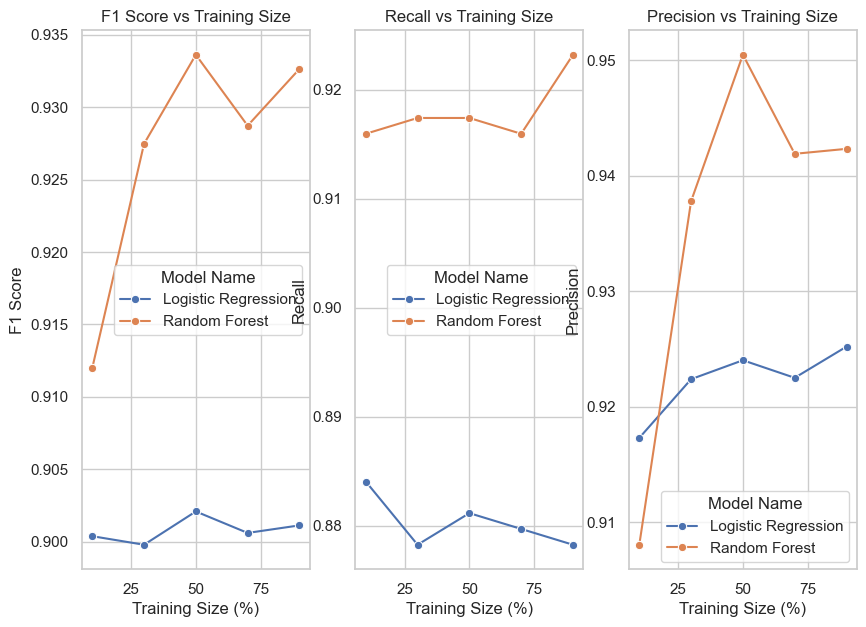

In [92]:
import seaborn as sns


# Plotting F1 Score, Recall, Precision vs Training Size for Different Models
#Make it 3x1 grid of plots

plt.figure(figsize=(10, 7))
plt.subplot(131)
sns.lineplot(data=df_comparison_plotting, x='Train Size Percentage', y='F1 Score', hue='Model Name', marker='o')
plt.title('F1 Score vs Training Size')
plt.xlabel('Training Size (%)')
plt.ylabel('F1 Score')

plt.subplot(132)
sns.lineplot(data=df_comparison_plotting, x='Train Size Percentage', y='Recall', hue='Model Name', marker='o')
plt.title('Recall vs Training Size')
plt.xlabel('Training Size (%)')
plt.ylabel('Recall')

plt.subplot(133)
sns.lineplot(data=df_comparison_plotting, x='Train Size Percentage', y='Precision', hue='Model Name', marker='o')
plt.title('Precision vs Training Size')
plt.xlabel('Training Size (%)')
plt.ylabel('Precision')

# plt.figure(figsize=(10,7))
# plt.subplot(111)
# plt.plot(df_comparison_plotting['Train Size'], df_comparison_plotting['F1 Score'], marker='o', c = df_comparison_plotting['Color'])
# plt.title('F1 Score vs Training Size for Different Models')
# plt.xlabel('Training Size')
# plt.ylabel('F1 Score')


# plt.subplot(121)
# plt.plot(df_comparison_plotting['Train Size'], df_comparison_plotting['Recall'], marker='o', c = df_comparison_plotting['Color'])
# plt.title('Recall vs Training Size for Different Models')
# plt.xlabel('Training Size')
# plt.ylabel('Recall')

# plt.subplot(122)
# plt.plot(df_comparison_plotting['Train Size'], df_comparison_plotting['Precision'], marker='o', c = df_comparison_plotting['Color'])
# plt.title('Precision vs Training Size for Different Models')
# plt.xlabel('Training Size')
# plt.ylabel('Precision')

# plt.tight_layout()
# plt.show()

# plt.plot(df_comparison_plotting['Train Size'], df_comparison_plotting['Time Taken (s)'], marker='o', c = df_comparison_plotting['Color'])
# plt.title('Time Taken vs Training Size for Different Models')
# plt.xlabel('Training Size')
# plt.ylabel('Time Taken (s)')
# plt.show()

c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also

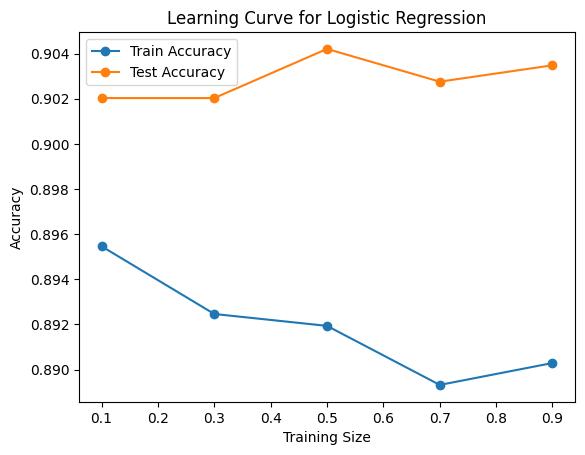

In [66]:
# Learning curve for Logistic Regression
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_accuracies = []
test_accuracies = []   
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(loaded_X, loaded_y, train_size=train_size, test_size=.05, random_state=42)
    model_LR = LogisticRegression(max_iter=3000)
    model_LR.fit(X_train, y_train)
    train_accuracy = model_LR.score(X_train, y_train)
    test_accuracy = model_LR.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
plt.plot(train_sizes, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

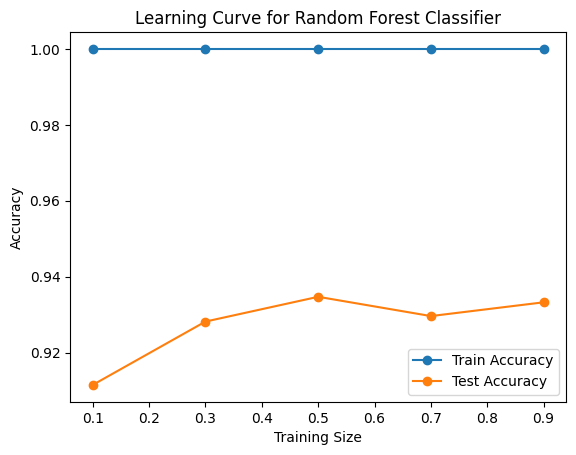

In [67]:
# Learning curve for Logistic Regression
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_accuracies = []
test_accuracies = []   
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(loaded_X, loaded_y, train_size=train_size, test_size=.05, random_state=42)
    model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    model_RF.fit(X_train, y_train)
    train_accuracy = model_RF.score(X_train, y_train)
    test_accuracy = model_RF.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
plt.plot(train_sizes, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Learning Curve for Random Forest Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification through Fine Tuning Pre-Trained Nueral Networks (Shufflenet)

In [ ]:
# Fine Tuning of shufflenet
import os
import argparse
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

Data Formatting!

- data/
  - train/
    - infected/
    - uninfected/
  - val/
    - infected/
    - uninfected/

In [ ]:
# Step 2: Load pretrained ShuffleNet



model = models.shufflenet_v2_x1_0(pretrained=True)

c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Tyler Marino\OneDrive\Desktop\GradSchool\Saclay\ComputerVision\Venv_CV\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
5.7%

Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to C:\Users\Tyler Marino/.cache\torch\hub\checkpoints\shufflenetv2_x1-5666bf0f80.pth


100.0%


In [4]:
# Step 3: Replace the classifier head
# ShuffleNet outputs 1024 features:



model.fc = nn.Linear(1024, 2)  # infected vs uninfected

In [5]:
# Step 4: Freeze most layers (important for small data)
for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

In [6]:
# Step 5: Define training components
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------
# Configuration
# -------------------------
DATA_DIR = "All_Data/cell_images"
BATCH_SIZE = 32
TRAIN_RATIO = 0.8
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)

# -------------------------
# Image preprocessing
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # required for ShuffleNet
    transforms.ToTensor()
])

# -------------------------
# Load full dataset
# -------------------------
full_dataset = ImageFolder(
    root=DATA_DIR,
    transform=transform
)

class_names = full_dataset.classes
print("Classes:", class_names)
print("Total images:", len(full_dataset))

# -------------------------
# Train / Test split
# -------------------------
train_size = int(TRAIN_RATIO * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size]
)

print(f"Train size: {len(train_dataset)}")
print(f"Test size:  {len(test_dataset)}")

# -------------------------
# DataLoaders
# -------------------------
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0  # keep 0 for CPU-only environments
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

# -------------------------
# Sanity check
# -------------------------
images, labels = next(iter(train_loader))
print("Batch image shape:", images.shape)
print("Batch label shape:", labels.shape)


Classes: ['Parasitized', 'Uninfected']
Total images: 27558
Train size: 22046
Test size:  5512
Batch image shape: torch.Size([32, 3, 224, 224])
Batch label shape: torch.Size([32])


In [9]:
# Step 7: Training loop (simple & timed)

import time

start_train = time.perf_counter()

for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

train_time = time.perf_counter() - start_train


In [10]:
# Step 8: Inference timing (CPU-only)

model.eval()

times = []
with torch.no_grad():
    for img, _ in test_loader:
        start = time.perf_counter()
        _ = model(img)
        times.append(time.perf_counter() - start)

avg_inference_time = sum(times)/len(times)


In [ ]:
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report

In [26]:
# 7. Evaluation (Make It Comparable)

y_true_SHUFFLENET = []
y_pred_SHUFFLENET = []

with torch.no_grad():  # no gradients needed
    for images, labels in test_loader:
        outputs = model(images)             # shape: [B, 2]
        _, preds = torch.max(outputs, 1)    # class index

        y_true_SHUFFLENET.extend(labels.cpu().numpy())
        y_pred_SHUFFLENET.extend(preds.cpu().numpy())


In [27]:
accuracy_SHUFFLENET  = accuracy_score(y_true_SHUFFLENET, y_pred_SHUFFLENET)
precision_SHUFFLENET = precision_score(y_true_SHUFFLENET, y_pred_SHUFFLENET, pos_label=0)  # Parasitic
recall_SHUFFLENET = recall_score(y_true_SHUFFLENET, y_pred_SHUFFLENET, pos_label=0)
f1_SHUFFLENET        = f1_score(y_true_SHUFFLENET, y_pred_SHUFFLENET, pos_label=0)

print(f"Accuracy:  {accuracy_SHUFFLENET:.4f}")
print(f"Precision: {precision_SHUFFLENET:.4f}")
print(f"Recall:    {recall_SHUFFLENET:.4f}")
print(f"F1-score:  {f1_SHUFFLENET:.4f}")
print(classification_report(y_true_SHUFFLENET, y_pred_SHUFFLENET, target_names=["Uninfected","Infected"]))
print(f"Training time (s):   {train_time:.2f}")
print(f"Avg inference time (s): {avg_inference_time:.4f} per batch of {BATCH_SIZE}")

Accuracy:  0.9307
Precision: 0.9436
Recall:    0.9127
F1-score:  0.9279
              precision    recall  f1-score   support

  Uninfected       0.94      0.91      0.93      2693
    Infected       0.92      0.95      0.93      2819

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512

Training time (s):   1621.14
Avg inference time (s): 0.2139 per batch of 32


[[2458  235]
 [ 147 2672]]


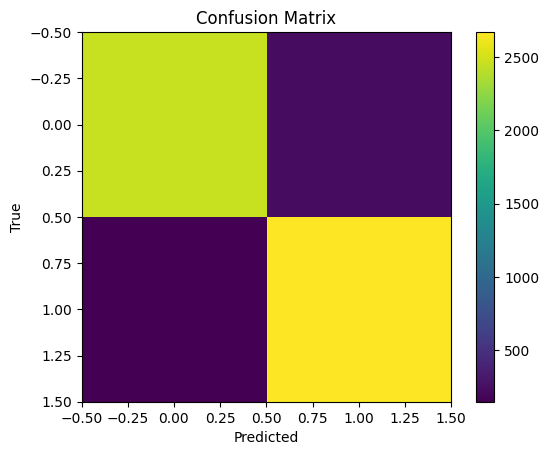

In [28]:
cm_SHUFFLENET = confusion_matrix(y_true_SHUFFLENET, y_pred_SHUFFLENET)
print(cm_SHUFFLENET)
import matplotlib.pyplot as plt

plt.imshow(cm_SHUFFLENET)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()
